<a href="https://colab.research.google.com/github/chavgova/My-AI/blob/master/emotion_recognition_26_female_160values_time_2D_avgPool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Voice Emotion Recognition**





In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import model_from_json
from matplotlib.pyplot import specgram
from matplotlib.axis import Axis
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, AveragePooling1D, AveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from array import *
import re
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

In [2]:
dataset_path = '/content/drive/My Drive/My_AI/RawData'  # https://drive.google.com/drive/folders/19vC20XHt-_yhsobePchy7K3PcBHD1oCu?usp=sharing
model_path = '/content/drive/MyDrive/My_AI/EmoRec/'      #'/content/drive/My Drive/My_AI/MY MODELS/'

model_name = 'EmotionRecognition_CNN_model_25_FEMALE_160values-time-2D-maxPool'
gender = 'female'  # female/male

# LABLES & FEATURES

In [ ]:
dataset_files_list = [] 
dataset_files_list = os.listdir(dataset_path)

print(len(dataset_files_list))

7198


In [ ]:
emo_labels_list=[] 
dataset = ''
count = 0
for item in dataset_files_list:
    file_label = item[6:-16]
    try:
      file_label = int(file_label)
      dataset = 'RAVDESS'
    except:
      if (item[:1] == 'Y') or (item[:1] == 'O'):
        file_label = re.split('_|\.', item)[2]
        dataset = 'TESS'
      else: 
        try:
          item = item[:-4]
          int(item[-3:])  
          dataset = 'SER_v4'
        except:
          dataset = 'SAVEE'

    if dataset == 'RAVDESS':
      if int(item[18:-4])%2==0:  #female
          if file_label == 1:
            emo_labels_list.append('female_neutral')
          elif file_label == 2:
            emo_labels_list.append('female_calm')
          elif file_label == 3:
            emo_labels_list.append('female_joy')
          elif file_label == 4:
            emo_labels_list.append('female_sadness')
          elif file_label == 5:
            emo_labels_list.append('female_anger')
          elif file_label == 6:
            emo_labels_list.append('female_fear')
          elif file_label == 7:
            emo_labels_list.append('female_disgust')
          elif file_label == 8:
            emo_labels_list.append('female_surprise')
      else:
          if file_label== 1:
            emo_labels_list.append('male_neutral')
          elif file_label == 2:
            emo_labels_list.append('male_calm')
          elif file_label == 3:
            emo_labels_list.append('male_joy')
          elif file_label == 4:
            emo_labels_list.append('male_sadness')
          elif file_label == 5:
            emo_labels_list.append('male_anger')
          elif file_label == 6:
            emo_labels_list.append('male_fear')
          elif file_label == 7:
            emo_labels_list.append('male_disgust')
          elif file_label == 8:
            emo_labels_list.append('male_surprise')

    elif dataset == 'TESS':
      if file_label == 'neutral': emo_labels_list.append('female_neutral')
      elif file_label == 'angry': emo_labels_list.append('female_anger')
      elif file_label == 'disgust': emo_labels_list.append('female_disgust')
      elif file_label == 'ps': emo_labels_list.append('female_surprise')
      elif file_label == 'happy': emo_labels_list.append('female_joy')
      elif file_label == 'sad': emo_labels_list.append('female_sadness')
      elif file_label == 'fear': emo_labels_list.append('female_fear')

    elif dataset == 'SER_v4':
      if int(item[-3:])%2 == 1: 
        file_label = item[:-3]
        if file_label == 'neutral': emo_labels_list.append('male_neutral')
        elif file_label == 'anger': emo_labels_list.append('male_anger')
        elif file_label == 'disgust': emo_labels_list.append('male_disgust')
        elif file_label == 'surprise': emo_labels_list.append('male_surprise')
        elif file_label == 'happy': emo_labels_list.append('male_joy')
        elif file_label == 'sad': emo_labels_list.append('male_sadness')
        elif file_label == 'fear': emo_labels_list.append('male_fear')
      else:
        file_label = item[:-3]
        if file_label == 'neutral': emo_labels_list.append('female_neutral')
        elif file_label == 'anger': emo_labels_list.append('female_anger')
        elif file_label == 'disgust': emo_labels_list.append('female_disgust')
        elif file_label == 'surprise': emo_labels_list.append('female_surprise')
        elif file_label == 'happy': emo_labels_list.append('female_joy')
        elif file_label == 'sad': emo_labels_list.append('female_sadness')
        elif file_label == 'fear': emo_labels_list.append('female_fear')
      
    elif dataset == 'SAVEE':
      if item[:1]=='a':
        emo_labels_list.append('male_anger')
      elif item[:1]=='f':
        emo_labels_list.append('male_fear')
      elif item[:1]=='h':
        emo_labels_list.append('male_joy')
      elif item[:1]=='n':
        emo_labels_list.append('male_neutral')
      elif item[:2]=='sa':
        emo_labels_list.append('male_sadness')
      elif item[:2]=='su':
        emo_labels_list.append('male_surprise')
      elif item[:1]=='d':
        emo_labels_list.append('male_disgust')


In [ ]:
emo_labels_array = np.array(emo_labels_list)
print(emo_labels_array.shape, emo_labels_array)

(7198,) ['male_sadness' 'male_sadness' 'male_sadness' ... 'female_calm'
 'female_sadness' 'female_joy']


Getting the features of audio files using librosa

In [3]:
def transform_feature(arr, num=20):   # to 20 values per feature
  l = len(arr)
  r = l%num
  if r==0:
    arr = np.mean(np.reshape(arr, (num,-1)), axis=1)
  elif r%2==0:
    arr = arr[int(r/2):-int(r/2)]
    arr = np.mean(np.reshape(arr, (num,-1)), axis=1)
  else:
    arr = arr[int(r/2+1):(len(arr)-int(r/2))]
    arr = np.mean(np.reshape(arr, (num,-1)), axis=1)
  return arr

def extract_feature(current_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    rolloff = kwargs.get("rolloff")
    centroids = kwargs.get("centroids")
    rms = kwargs.get("rms")

    X, sample_rate = librosa.core.load(current_file)

    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.zeros([8,20])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc= 20 ), axis=0)
        mfccs = transform_feature(mfccs) # (n=20,t) -> 20 values (avg)
        result[0] = mfccs
    if rms:    
        rms = np.mean(librosa.feature.rms(X),axis=0)
        rms = transform_feature(rms)      # (1,t) - > 20 values (avg)
        result[1] = rms       
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate, n_fft = 2048), axis=0) # (128,t) 
        mel = transform_feature(mel)  # t -> 20 values (avg)
        result[2] = mel 
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate), axis=0) # (6,t) -> 6 values   
        tonnetz = transform_feature(tonnetz)  
        result[3] = tonnetz
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, n_chroma = 10, sr=sample_rate, n_fft = 2048), axis=0)  # (n=14,t) -> 14 values   
        chroma = transform_feature(chroma)     
        result[4] = chroma             
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate, n_fft=2048), axis=0) # (7,t) -> 7 values
        contrast = transform_feature(contrast)
        result[5] = contrast
    if rolloff:    
        rolloff = np.mean(librosa.feature.spectral_rolloff(X + 0.01, sr=sample_rate, n_fft=2048), axis=0)
        rolloff = transform_feature(rolloff)    # (1,t) - > 20 values (avg)
        result[6] = rolloff
    if centroids:    
        centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate, n_fft=2048), axis=0)
        centroids = transform_feature(centroids)  # (1,t) - > 20 values (avg)
        result[7] = centroids 
    
    return result

f = os.fspath(dataset_path + '/1078_MTI_ANG_XX.wav')
a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
print(a, a.shape)

feature_num_values = a.shape[0]  # number of values per file

[[-1.40765276e+01 -1.17176304e+01 -1.11633663e+01 -1.10790663e+01
  -1.07774687e+01 -1.05370426e+01 -1.03541460e+01 -9.13975620e+00
  -9.50955486e+00 -1.00974951e+01 -1.07620468e+01 -1.02513018e+01
  -1.00416851e+01 -9.85334873e+00 -1.10257387e+01 -1.21459579e+01
  -1.22862349e+01 -1.17299776e+01 -1.31954193e+01 -1.30548735e+01]
 [ 5.34453709e-03  4.69109006e-02  4.77194898e-02  2.04378311e-02
   2.07569897e-02  6.38693422e-02  1.15599774e-01  1.28232926e-01
   1.19728044e-01  4.23759073e-02  6.89805821e-02  3.91004011e-02
   2.99107432e-02  2.31280867e-02  1.03316210e-01  1.08218350e-01
   4.17245924e-02  9.10387840e-03  5.57138817e-03  4.28530062e-03]
 [ 4.66448301e-03  5.39627373e-01  5.17243147e-01  9.77239087e-02
   9.27279145e-02  1.06992722e+00  3.25262403e+00  3.27466846e+00
   4.60871553e+00  4.21025276e-01  1.31157303e+00  2.56834269e-01
   2.00264901e-01  1.06908917e-01  3.04708433e+00  2.77486229e+00
   4.00192797e-01  1.83953121e-02  6.66718464e-03  4.41992190e-03]
 [-3.15

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=909
  n_fft, y.shape[-1]


EXTRACT FEATURES FROM THE FILES IN THE DATASETS

In [ ]:
data_frame_features = pd.DataFrame(columns=['all_features'])

for index,y in enumerate(dataset_files_list):
      all_features_ndarray = extract_feature(dataset_path + '/'+ y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
      data_frame_features.loc[index] = [all_features_ndarray]
      if index%1000==0: print(index)

print(pd.DataFrame(data_frame_features['all_features']).shape)
        

In [ ]:
data_frame_features = pd.DataFrame(data_frame_features['all_features'])
data_frame_labels = pd.concat([data_frame_features,labels], axis=1)
data_frame_labels = data_frame_labels.rename(index=str, columns={"0": "label"})
data_frame_labels  

,all_features,0
0,"[[-38.91777038574219, -36.885902404785156, -36...",male_sadness
1,"[[-36.91215896606445, -36.90217590332031, -33....",male_sadness
2,"[[-42.30324935913086, -42.30324935913086, -42....",male_sadness
3,"[[-35.22417449951172, -34.31071472167969, -34....",female_sadness
4,"[[-39.61149978637695, -39.59251022338867, -39....",male_sadness
...,...,...
7193,"[[-37.4224967956543, -36.9178581237793, -36.90...",male_fear
7194,"[[-36.548248291015625, -36.69108963012695, -35...",male_anger
7195,"[[-46.47096633911133, -46.47096633911133, -46....",female_calm
7196,"[[-43.943607330322266, -43.93301773071289, -43...",female_sadness


In [ ]:
features_array_2d = data_frame_features['all_features'].to_numpy()
features_array_2d = np.vstack(features_array_2d).reshape((7198,8,20))
print(features_array_2d[0], features_array_2d[0].shape)

[[-3.89177704e+01 -3.68859024e+01 -3.63584328e+01 -3.74193916e+01
  -2.83406963e+01 -2.87459278e+01 -2.79423904e+01 -2.69776630e+01
  -2.70889626e+01 -3.13372803e+01 -2.92532997e+01 -2.85650234e+01
  -2.75980797e+01 -2.87370262e+01 -2.97208729e+01 -3.06429844e+01
  -3.39568291e+01 -3.83484116e+01 -3.77469292e+01 -3.36466141e+01]
 [ 1.04389555e-05  1.56468668e-05  1.76005342e-05  5.68504656e-05
   2.00775755e-03  4.07104380e-03  7.69216893e-03  8.03639088e-03
   6.36524707e-03  5.57981245e-03  8.34166259e-03  7.53696356e-03
   4.40457975e-03  6.90991990e-03  7.42966123e-03  3.59069230e-03
   3.53443786e-04  3.02281442e-05  1.53825258e-05  8.11256177e-05]
 [ 1.96594723e-08  4.94978920e-08  5.39034026e-08  9.93848346e-08
   1.35009049e-03  4.58268635e-03  1.82337146e-02  2.19561327e-02
   1.27984593e-02  7.16360984e-03  1.66460052e-02  1.39170922e-02
   6.13671774e-03  1.22508239e-02  1.31954197e-02  3.65859433e-03
   3.86528118e-05  2.42626243e-07  4.55703848e-08  1.36563756e-06]
 [-3.27

# SAVE DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + model_name + '_features_array_2D.pkl'), 'wb') as f:
  pickle.dump(features_array_2d, f)
with open((model_path + model_name + '_labels_array.pkl'), 'wb') as f:
  pickle.dump(emo_labels_array, f)

# LOAD DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + model_name + '_features_array_2D.pkl'), 'rb') as f:
  features_array_2d = pickle.load(f)
with open((model_path + model_name + '_labels_array.pkl'), 'rb') as f:
  emo_labels_array = pickle.load(f)

print(features_array_2d.shape)
print(emo_labels_array.shape)

(7198, 8, 20)
(7198,)


In [ ]:
np.reshape(features_array_2d, (8,), order= 'C' or 'F' or 'A')

-39.563934326171875

In [ ]:
features_array_2d.T.shape

(20, 8, 7198)

In [ ]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler


class NDStandardScaler(TransformerMixin):
    def __init__(self, **kwargs):
        self._scaler = StandardScaler(copy=True, **kwargs)
        self._orig_shape = None

    def fit(self, X, **kwargs):
        X = np.array(X)
        # Save the original shape to reshape the flattened X later
        # back to its original shape
        if len(X.shape) > 1:
            self._orig_shape = X.shape[1:]
        X = self._flatten(X)
        self._scaler.fit(X, **kwargs)
        return self

    def transform(self, X, **kwargs):
        X = np.array(X)
        X = self._flatten(X)
        X = self._scaler.transform(X, **kwargs)
        X = self._reshape(X)
        return X

    def _flatten(self, X):
        # Reshape X to <= 2 dimensions
        if len(X.shape) > 2:
            n_dims = np.prod(self._orig_shape)
            X = X.reshape(-1, n_dims)
        return X

    def _reshape(self, X):
        # Reshape X back to it's original shape
        if len(X.shape) >= 2:
            X = X.reshape(-1, *self._orig_shape)
        return X

scaler = NDStandardScaler()
print(scaler.fit_transform(features_array_2d).shape)
pickle.dump(scaler, open(model_path + model_name + '_SCALER.sav', 'wb'))

(7198, 8, 20)


# **PREPROCESSING - SCALING**




In [ ]:
'''scaler = MinMaxScaler()
features_array_scaled = scaler.fit_transform(features_array_2d)

pickle.dump(scaler, open(model_path + model_name + '_SCALER.sav', 'wb'))

features_array_scaled'''

In [ ]:
scaler = pickle.load(open(model_path + model_name + '_SCALER.sav', 'rb'))
features_array_scaled = scaler.transform(features_array_2d)
features_array_scaled.shape

(7198, 8, 20)

# **SAVE SCALED ARRAY AND LABELS**






In [ ]:
with open((model_path + model_name + '_SCALED_featuresArray.pkl'), 'wb') as f:
  pickle.dump(features_array_scaled, f)

with open((model_path + model_name + '_labelsArray.pkl'), 'wb') as f:
  pickle.dump(labels_array, f)

# LOAD LABELS AND SCALED FEATURES

In [4]:
with open((model_path + 'EmotionRecognition_CNN_model_21_FEMALE_160values-time-2D' + '_SCALED_featuresArray.pkl'), 'rb') as f:
  features_array_scaled = pickle.load(f)

with open((model_path + 'EmotionRecognition_CNN_model_21_FEMALE_160values-time-2D' + '_labelsArray.pkl'), 'rb') as f:
  labels_array = pickle.load(f)

In [5]:
def takeMaleData(labels_array, features_array_scaled):
  labels_filtered_array = []
  features_filtered_array =  []

  for index, i in enumerate(labels_array):
    if 'female' not in i[0]:  
      labels_filtered_array.append(labels_array[index])
      features_filtered_array.append(features_array_scaled[index])
  return np.array(labels_filtered_array), np.array(features_filtered_array)

def takeFemaleData(labels_array, features_array_scaled):
  labels_filtered_array = []
  features_filtered_array =  []

  for index, i in enumerate(labels_array):
    if 'female' in i[0]:  
      labels_filtered_array.append(labels_array[index])
      features_filtered_array.append(features_array_scaled[index])
  return np.array(labels_filtered_array), np.array(features_filtered_array)

if gender.lower() == 'female':
  labels_filtered_array, features_filtered_array = takeFemaleData(labels_array, features_array_scaled)  
elif gender.lower() == 'male':
  labels_filtered_array, features_filtered_array = takeMaleData(labels_array, features_array_scaled) 
  
print(labels_filtered_array)
print(features_filtered_array.shape)

[['female_sadness']
 ['female_sadness']
 ['female_sadness']
 ...
 ['female_calm']
 ['female_sadness']
 ['female_joy']]
(4745, 8, 20)


SAVE LABEL ENCODER CLASSES

In [6]:
lb = LabelEncoder()
lb.fit(labels_filtered_array)
print(lb.classes_)
with open((model_path + gender + '_classes_emotions.pkl'), 'wb') as f:
  pickle.dump(lb.classes_, f)  

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']


LOAD LABEL ENCODER CLASSES

In [7]:
lb = LabelEncoder()
with open((model_path + gender + '_classes_emotions.pkl'), 'rb') as f:
  lb.classes_ = pickle.load(f)
print(lb.classes_)

['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']


SHUFFLE FILES AND LABELS 

In [8]:
features_filt_shuff_array, labels_filt_shuff_array = shuffle(features_filtered_array, labels_filtered_array)

print(labels_filt_shuff_array)

[['female_surprise']
 ['female_surprise']
 ['female_sadness']
 ...
 ['female_sadness']
 ['female_anger']
 ['female_fear']]



# Dividing the data into test and train

In [9]:
train_samples_num = round(len(labels_filtered_array)*0.8)

X_train = np.array(features_filt_shuff_array[:train_samples_num]) #train_features_array
y_train = np.array(labels_filt_shuff_array[:train_samples_num]) #train_label_array
X_test = np.array(features_filt_shuff_array[train_samples_num:]) #test_features_array
y_test = np.array(labels_filt_shuff_array[train_samples_num:]) #test_label_array

TRANSFORM LABELS

In [10]:
y_train = np_utils.to_categorical(lb.transform(y_train))
y_test = np_utils.to_categorical(lb.transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
x_traincnn = np.expand_dims(X_train, axis=3)
x_testcnn = np.expand_dims(X_test, axis=3)
print(x_testcnn.shape)

(949, 8, 20, 1)


# **MODEL**

In [12]:
input_shape = x_traincnn.shape[1:]
num_classes = 8  
model = Sequential()

model.add(Conv2D(64,kernel_size=(1,1),padding='same', activation='tanh', input_shape=input_shape))

model.add(Conv2D(64, kernel_size=(2,2),padding='same', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(4,4),padding='same', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(2,2),padding='same', activation='tanh'))

model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 20, 64)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 20, 64)         16448     
_________________________________________________________________
average_pooling2d (AveragePo (None, 4, 10, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 10, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 10, 32)         32800     
_________________________________________________________________
average_pooling2d_1 (Average (None, 2, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 5, 32)          0

In [14]:
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [15]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size = 32, epochs = 200, validation_data = (x_testcnn, y_test))

Epoch 1/200
119/119 [==============================] - 6s 38ms/step - loss: 1.9875 - accuracy: 0.2443 - val_loss: 1.7737 - val_accuracy: 0.3319
Epoch 2/200
119/119 [==============================] - 4s 35ms/step - loss: 1.7295 - accuracy: 0.3508 - val_loss: 1.6390 - val_accuracy: 0.3952
Epoch 3/200
119/119 [==============================] - 4s 35ms/step - loss: 1.5807 - accuracy: 0.4082 - val_loss: 1.5493 - val_accuracy: 0.4510
Epoch 4/200
119/119 [==============================] - 4s 34ms/step - loss: 1.5178 - accuracy: 0.4453 - val_loss: 1.4834 - val_accuracy: 0.4784
Epoch 5/200
119/119 [==============================] - 4s 35ms/step - loss: 1.4595 - accuracy: 0.4672 - val_loss: 1.4356 - val_accuracy: 0.4910
Epoch 6/200
119/119 [==============================] - 4s 35ms/step - loss: 1.3863 - accuracy: 0.5093 - val_loss: 1.3866 - val_accuracy: 0.5100
Epoch 7/200
119/119 [==============================] - 4s 35ms/step - loss: 1.3079 - accuracy: 0.5424 - val_loss: 1.3474 - val_accuracy:

# **PLOTTING**

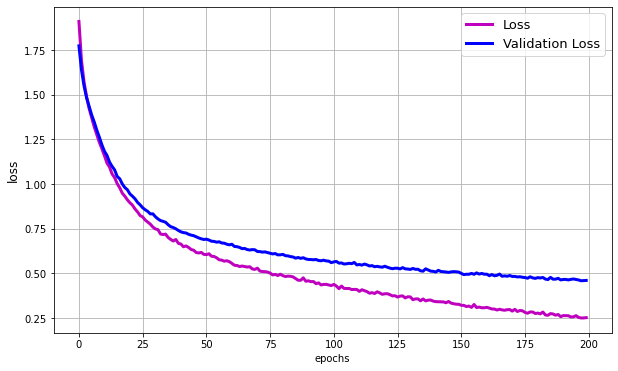

In [16]:
plt.figure(figsize=(10,6))
plt.plot(cnnhistory.history['loss'], 'm', linewidth=3)
plt.plot(cnnhistory.history['val_loss'], 'b', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

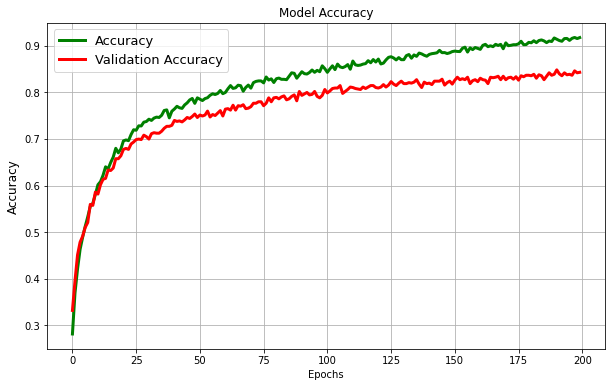

In [17]:
plt.figure(figsize=(10,6), frameon=True)
plt.plot(cnnhistory.history['accuracy'], 'g', linewidth=3)
plt.plot(cnnhistory.history['val_accuracy'], 'r', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)
plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

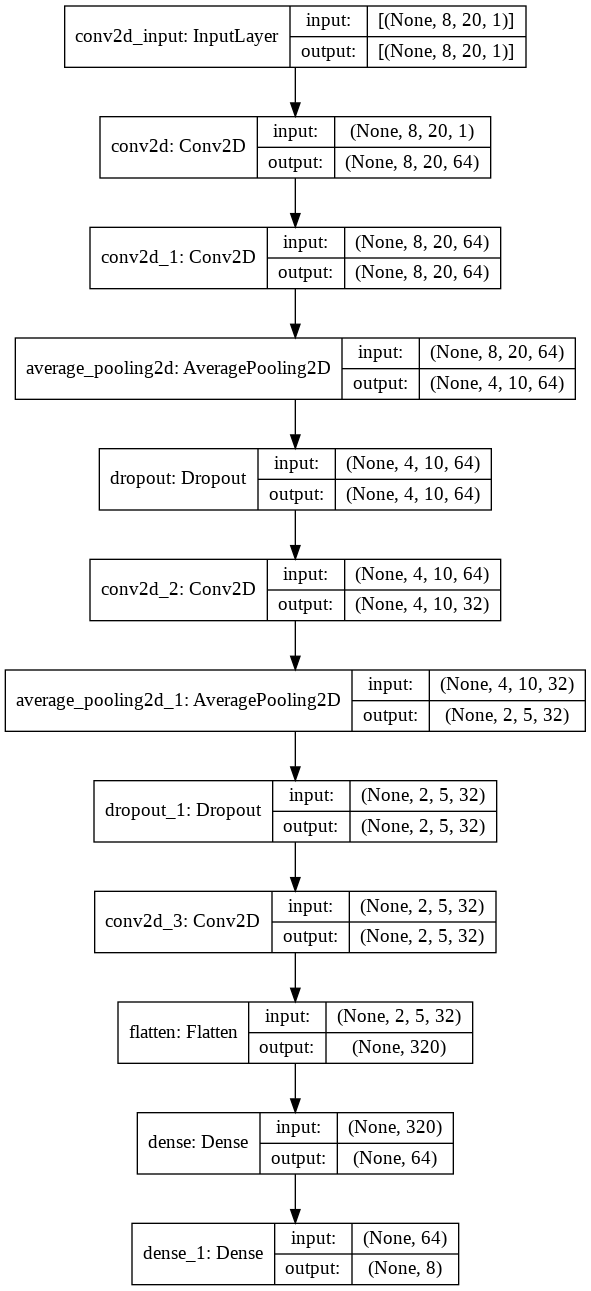

In [18]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = (model_path + 'img_cnn_model_' + model_name + '.png')
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)


# **SAVING THE MODEL**

In [19]:
model.save(os.path.join(model_path, (model_name + '_MODEL_200.h5')))
print('Saved trained model at %s ' % model_path)

model_json = model.to_json()
with open((model_path + model_name + '_MODEL_200.json'), "w") as json_file:
    json_file.write(model_json)

Saved trained model at /content/drive/MyDrive/My_AI/EmoRec/ 


# **LOADING THE MODEL**

In [20]:
json_file = open(model_path + model_name + '_MODEL_200.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(model_path + model_name + '_MODEL_200.h5')
print("Loaded model from disk")

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 84.30%


# **Predicting emotions on the test data**


In [21]:
lb = LabelEncoder()
with open((model_path + gender + '_classes_emotions.pkl'), 'rb') as f:
  lb.classes_ = pickle.load(f)
print(lb.classes_)

predicted = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
predicted = predicted.argmax(axis=1)
predicted = predicted.astype(int).flatten()

predictions = (lb.inverse_transform((predicted)))
predictions_df = pd.DataFrame({'predictedvalues': predictions})

actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()

actual_labels = (lb.inverse_transform((actual)))

actual_labels = pd.DataFrame({'actualvalues': actual_labels})
actual_pred_df = actual_labels.join(predictions_df)

actual_pred_df[40:50]

['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']
30/30 [==============================] - 0s 8ms/step


,actualvalues,predictedvalues
40,female_surprise,female_surprise
41,female_disgust,female_disgust
42,female_anger,female_anger
43,female_fear,female_fear
44,female_disgust,female_disgust
45,female_calm,female_calm
46,female_neutral,female_neutral
47,female_fear,female_joy
48,female_joy,female_joy
49,female_joy,female_joy


In [22]:
actual_pred_df.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_anger,135
female_calm,13
female_disgust,128
female_fear,141
female_joy,144
female_neutral,121
female_sadness,150
female_surprise,117


In [23]:
actual_pred_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_anger,133
female_calm,14
female_disgust,114
female_fear,148
female_joy,138
female_neutral,114
female_sadness,161
female_surprise,127


In [24]:
actual_pred_df.to_csv(model_path + model_name + '_PREDICTIONS' + '.csv', index=False)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classes = actual_pred_df.actualvalues.unique()
classes.sort()    
print(classification_report(actual_pred_df.actualvalues, actual_pred_df.predictedvalues, target_names=classes))


                 precision    recall  f1-score   support

   female_anger       0.88      0.87      0.87       135
    female_calm       0.79      0.85      0.81        13
 female_disgust       0.96      0.85      0.90       128
    female_fear       0.78      0.82      0.80       141
     female_joy       0.79      0.76      0.77       144
 female_neutral       0.91      0.86      0.89       121
 female_sadness       0.83      0.89      0.86       150
female_surprise       0.79      0.85      0.82       117

       accuracy                           0.84       949
      macro avg       0.84      0.84      0.84       949
   weighted avg       0.85      0.84      0.84       949



0.8429926238145417


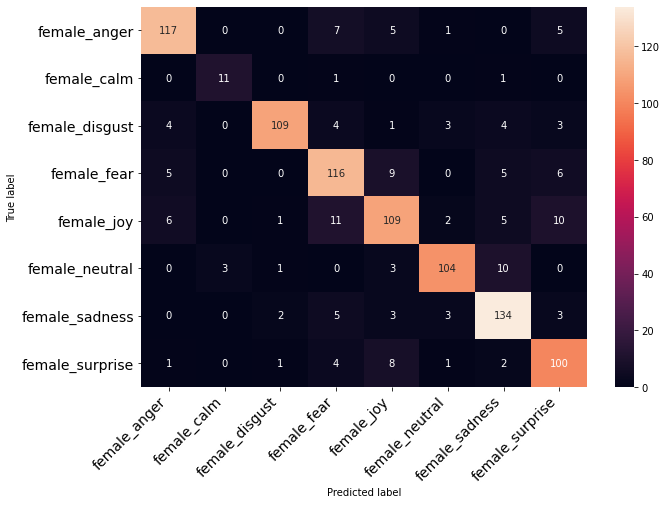

In [26]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_joy' or 'female_sadness' or 'female_surprise' or 'female_neutral' or 'female_anger' or 'female_calm':
        return 'female'

actual_pred_df = pd.read_csv(model_path + model_name + '_PREDICTIONS' + '.csv')
classes = actual_pred_df.actualvalues.unique()
classes.sort()    

c = confusion_matrix(actual_pred_df.actualvalues, actual_pred_df.predictedvalues)
print(accuracy_score(actual_pred_df.actualvalues, actual_pred_df.predictedvalues))
print_confusion_matrix(c, class_names = classes)